In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!ls

AB Testing.ipynb      Qestions.ipynb        car_data_mani.ipynb
Numpy_exp.ipynb       README.md             data
Pandas_exp.ipynb      SQL.ipynb             python_question.ipynb
Pandas_exp.md         X_hold.csv            readychef.pgsql


In [4]:
df = pd.read_csv('X_hold.csv')

In [5]:
df.head()

,year,mileage,model_1500,model_2500,model_328i,model_3500,model_3series,model_4runner,model_5series,model_a4,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,paint_color_nan
0,0.375,0.576461,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.050,-1.464440,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.250,-0.304304,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.275,1.457649,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.250,-0.280987,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19098 entries, 0 to 19097
Columns: 163 entries, year to paint_color_nan
dtypes: float64(2), int64(161)
memory usage: 23.8 MB


In [8]:
df.sample(n=10)

,year,mileage,model_1500,model_2500,model_328i,model_3500,model_3series,model_4runner,model_5series,model_a4,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,paint_color_nan
10561,0.300,0.669663,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1817,0.075,-1.259580,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16188,0.100,-1.083766,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10862,0.425,1.960113,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7352,0.525,3.982593,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11612,0.150,-0.299458,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18327,0.225,-0.833288,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9655,0.450,0.864542,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3727,0.100,-0.963213,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5097,0.275,0.716688,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
df['year'].fillna(0, inplace=True)
df['year'].apply(lambda x : x+1 if x<.5 else 0).head()

0    1.375
1    1.050
2    1.250
3    1.275
4    1.250
Name: year, dtype: float64

In [31]:
df.loc[df['year']>.5].head()

,year,mileage,model_1500,model_2500,model_328i,model_3500,model_3series,model_4runner,model_5series,model_a4,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,paint_color_nan
24,0.675,1.711838,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29,0.700,0.889096,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46,0.525,-0.050539,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0.700,0.152812,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
59,0.600,0.931342,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
df1 = df.sample(10)
df2 = df.sample(20)

In [40]:
df1.merge(df2, on='year', how='outer').head()

,year,mileage_x,model_1500_x,model_2500_x,model_328i_x,model_3500_x,model_3series_x,model_4runner_x,model_5series_x,model_a4_x,...,paint_color_custom_y,paint_color_green_y,paint_color_grey_y,paint_color_orange_y,paint_color_purple_y,paint_color_red_y,paint_color_silver_y,paint_color_white_y,paint_color_yellow_y,paint_color_nan_y
0,0.425,0.678136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.150,-0.169160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.150,-0.169160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.150,-0.169160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150,-0.169160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
df3=pd.concat([df1, df2], axis=0)

(array([1., 2., 0., 3., 6., 0., 3., 0., 2., 3., 0., 3., 1., 2., 1., 0., 1.,
        0., 1., 1.]),
 array([0.025  , 0.05375, 0.0825 , 0.11125, 0.14   , 0.16875, 0.1975 ,
        0.22625, 0.255  , 0.28375, 0.3125 , 0.34125, 0.37   , 0.39875,
        0.4275 , 0.45625, 0.485  , 0.51375, 0.5425 , 0.57125, 0.6    ]),
 <a list of 20 Patch objects>)

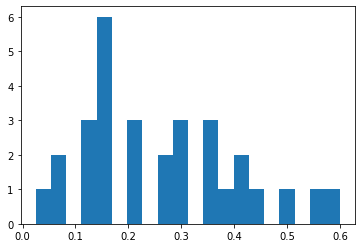

In [46]:
plt.hist(df3['year'], bins=20)

In [47]:
from sklearn.linear_model import LinearRegression

In [51]:
from sklearn.model_selection import train_test_split

In [48]:
lr=LinearRegression()

In [59]:
y=df.pop('year')

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2)

In [62]:
model=lr.fit(X_train, y_train)

In [ ]:
model.s